In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

df = pd.read_csv('Telco-Customer-Churn.csv')
display(df.head(5))
print(df.info())
print(df.describe())
print(df.columns)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [46]:
display(df.isnull().sum())
display(df.duplicated())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7043, dtype: bool

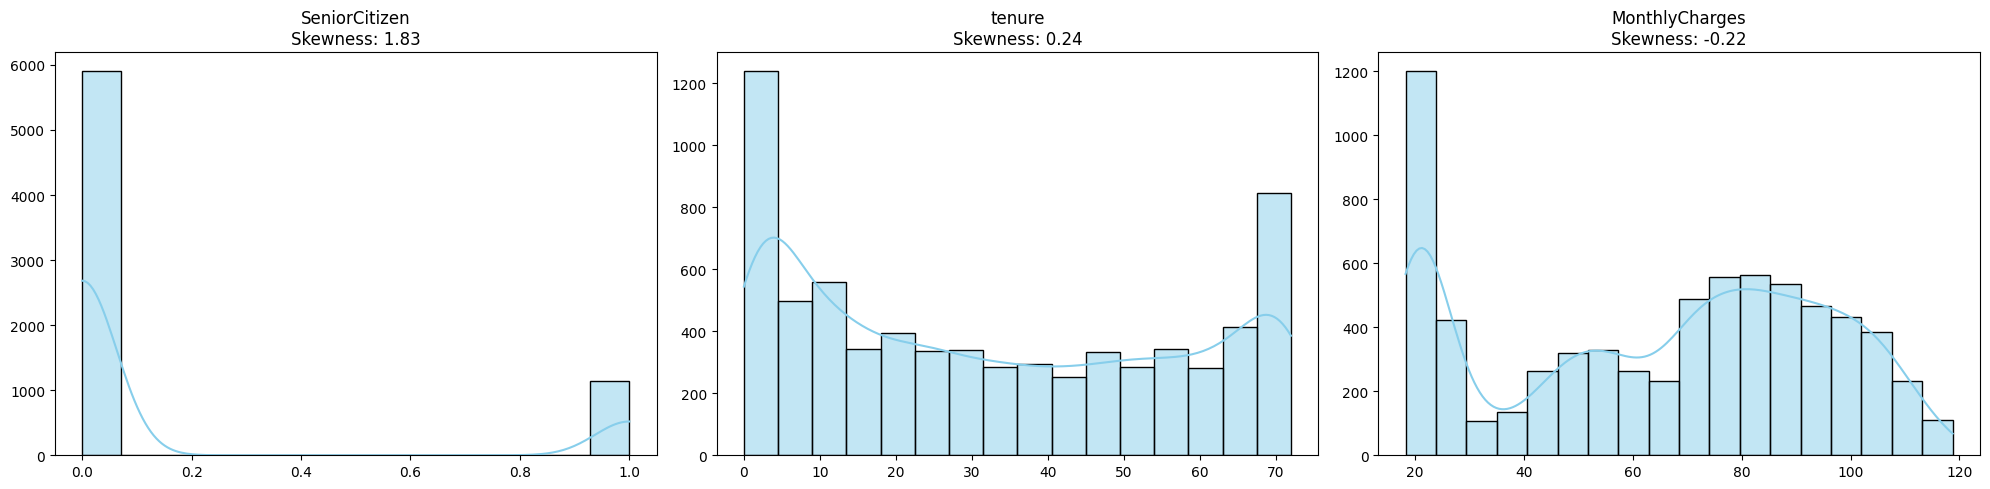

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(20, 5))

for i, col in enumerate(num_cols, 1):
    plt.subplot(1, len(num_cols), i)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'{col}\nSkewness: {df[col].skew():.2f}')
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()

  Churn  Churn_cat
0    No          0
1    No          0
2   Yes          1
3    No          0
4   Yes          1


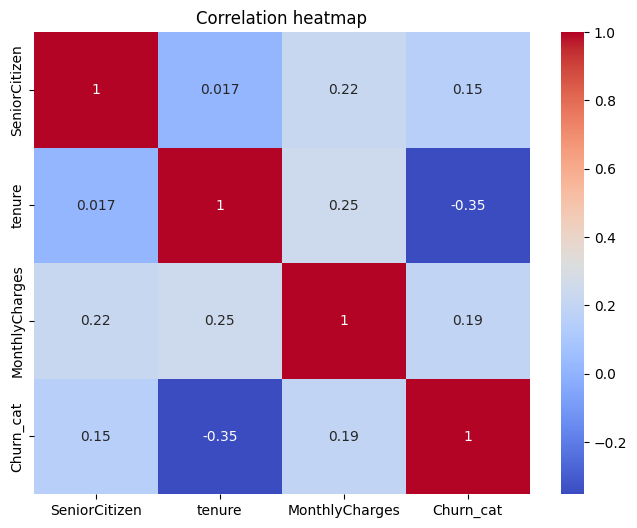

In [48]:
# Encode Churn as categorical code
df['Churn_cat'] = pd.Categorical(df['Churn']).codes

print(df[['Churn', 'Churn_cat']].head())

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation heatmap")
plt.show()

In [49]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()


for col in cat_cols:
    df[col] = pd.factorize(df[col])[0]

print(df.head())


   customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0           0       0              0        0           0       1   
1           1       1              0        1           0      34   
2           2       1              0        1           0       2   
3           3       1              0        1           0      45   
4           4       0              0        1           0       2   

   PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0             0              0                0               0  ...   
1             1              1                0               1  ...   
2             1              1                0               1  ...   
3             0              0                0               1  ...   
4             1              1                1               0  ...   

   TechSupport  StreamingTV  StreamingMovies  Contract  PaperlessBilling  \
0            0            0                0         0                 0   


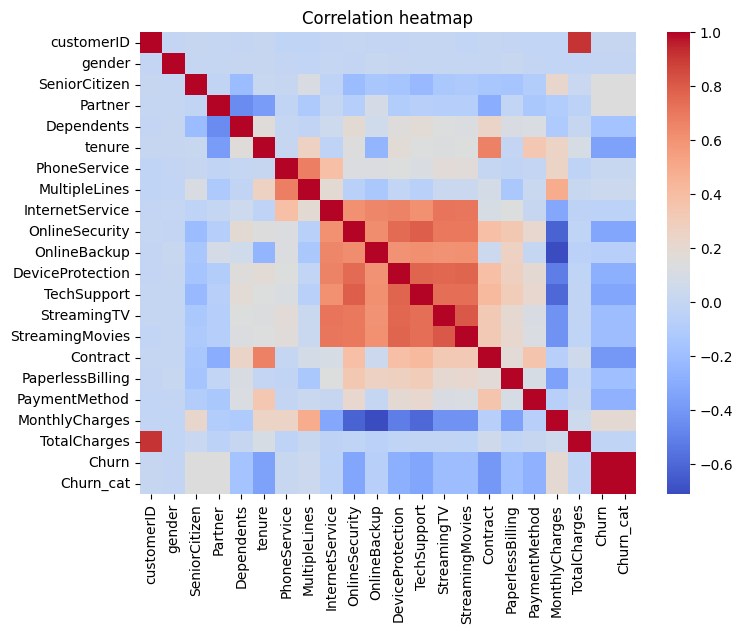

In [50]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm")
plt.title("Correlation heatmap")
plt.show()

In [51]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Churn_cat'],
      dtype='object')

In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

df = pd.read_csv("Telco-Customer-Churn.csv")

df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})
df = df.dropna(subset=['Churn'])

for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype.name == 'category':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].fillna('Missing').astype(str))

features = ['MonthlyCharges', 'tenure', 'Contract']
X = df[features]
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LogisticRegression(max_iter=20000)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"Precision: {precision_score(y_test, y_pred):.2f}")
print(f"Recall: {recall_score(y_test, y_pred):.2f}")
print(f"F1-score: {f1_score(y_test, y_pred):.2f}")


Test Accuracy: 0.80
Precision: 0.65
Recall: 0.53
F1-score: 0.59


In [53]:
df.columns


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import pandas as pd

features = ['MonthlyCharges', 'tenure', 'Contract']
target = 'Churn'

for col in features:
    if df[col].dtype == 'object' or df[col].dtype.name == 'category':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].fillna('Missing').astype(str))
        print(f"Encoded {col}")

if df[target].dtype == 'object':
    df[target] = df[target].map({'No': 0, 'Yes': 1})
    print(f"Encoded {target}")

features = ['MonthlyCharges', 'tenure', 'Contract']
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=1000,          
    max_depth=10,               
    min_samples_split=10,       
    min_samples_leaf=5,         
    max_features='sqrt',        
    bootstrap=True,            
    oob_score=True,             
    criterion='gini',           
    random_state=42,            
    n_jobs=-1                   
)
rf.fit(X_train, y_train)

accuracy = rf.score(X_test, y_test)
print(f"Test accuracy: {accuracy:.2f}")
print(f"Precision: {precision_score(y_test, y_pred):.2f}")
print(f"Recall: {recall_score(y_test, y_pred):.2f}")
print(f"F1-score: {f1_score(y_test, y_pred):.2f}")

Test accuracy: 0.79
Precision: 0.65
Recall: 0.53
F1-score: 0.59


In [55]:
import joblib
joblib.dump(rf, 'Random_forest.pkl')

['Random_forest.pkl']